In [1]:
# # configs

# {
#     "API_settings": {
#         "snowflake_parameters": {
#             "user": "user",
#             "password": "password"
#         }
#     },
#     "default_weights_constraint": [0.001, 0.05],
#     "trans_cost": 0.0,
#     "portfolio_datasource": {
#         "start_date": "01/01/2018",
#         "end_date": "12/28/2023",
#         "custom_universe": [],
#         "equity_universe": ["S & P 500 INDEX"],
#         "fixed_income_universe": [],
#         "tcw_universe": [],
#         "sustainable": false
#     },    
#     "marketmultiple_datasource": {
#         "filters": {
#             "start_date": "2013-01-01"
#         }
#     },
#     "prices_datasource": {
#         "rebalance": "MONTH",
#         "filters": {
#             "date": {"start_date": "2018-01-01"}
#         },
#         "source": 3,
#         "table_name": "PRICES",
#         "database": "SANDBOX_ESG",
#         "schema": "QUANT_RESEARCH"
#     },
#     "fundamentals_datasource": {
#         "source": 3,
#         "filters": {
#             "calendardate": {"start_date": "2017-01-01"}
#         },
#         "table_name": "FUNDAMENTAL_DATA",
#         "database": "SANDBOX_ESG",
#         "schema": "QUANT_RESEARCH"
#     },
#     "strategies": {
#         "benchmark": {
#             "type": "pick_all",
#             "stop_loss": null,
#             "stop_loss_threshold": 0.1,
#             "window_size": 63,
#             "portfolio_leverage": 1,
#             "return_engine": "log_normal",
#             "risk_engine": "log_normal",
#             "allocation_models": ["equal_weight", "market_weight", "original_weight"]
#         },
#         "mean_reversion": {
#             "type": "mean_reversion",
#             "stop_loss": null,
#             "stop_loss_threshold": 0.0,
#             "risk_window_size": 63,
#             "return_window_size": 126,
#             "portfolio_leverage": 1,
#             "return_engine": "cumprod",
#             "risk_engine": "log_normal",
#             "decile": 1,
#             "fraud_threshold": 0.8,
#             "allocation_models": [
#                 "market_weight", "equal_weight"
#             ]
#         },
#         "momentum": {
#             "type": "mean_reversion",
#             "stop_loss": null,
#             "stop_loss_threshold": 0.0,
#             "risk_window_size": 63,
#             "return_window_size": 126,
#             "portfolio_leverage": 1,
#             "return_engine": "cumprod",
#             "risk_engine": "log_normal",
#             "decile": 10,
#             "fraud_threshold": 0.8,
#             "allocation_models": [
#                 "market_weight", "equal_weight"
#             ]
#         }
#     }
# }

In [2]:
# add quantkit to path
import sys
from pathlib import Path
d = Path().resolve().parent.parent
sys.path.insert(0, str(d))

In [3]:
import pandas as pd
import numpy as np
import quantkit.backtester.runner_backtester as runner
import warnings
warnings.filterwarnings("ignore")

local_configs = "C:\\Users\\bastit\\OneDrive - The TCW Group Inc\\Documents\\quantkit\\configs\\mean_reversion.json"

r = runner.Runner()
r.init(local_configs=local_configs) 
r.run()

2024-04-05 12:43:42,919  WORKING ON: Start Iterating
2024-04-05 12:43:42,919  WORKING ON: Loading Ticker Parent Issuer Data
2024-04-05 12:43:43,876  WORKING ON: Loading Portfolio Data
2024-04-05 12:44:04,760  WORKING ON: Batch 1/1
2024-04-05 12:44:05,655  WORKING ON: ['The following identifiers were not recognized, matched multiple issuers, or are not available to this user and were ignored: US8873173038, US90130A4085, US03349M1053, APARTMENT INVESTMENT & MGMT - .']
2024-04-05 12:44:05,811  WORKING ON: Loading MSCI Data
2024-04-05 12:44:18,490  WORKING ON: Batch 1/1
2024-04-05 12:44:19,373  WORKING ON: ['The following identifiers were not recognized, matched multiple issuers, or are not available to this user and were ignored: NoISSUERID.']
2024-04-05 12:44:19,407  WORKING ON: Loading Price Data
2024-04-05 12:44:23,793  WORKING ON: Loading Fundamental Data
2024-04-05 12:44:27,298  WORKING ON: Loading Market Multiples Data
2024-04-05 12:44:28,663  WORKING ON: Iterate Holdings
2024-04-05

# Benchmark

<Figure size 640x480 with 0 Axes>

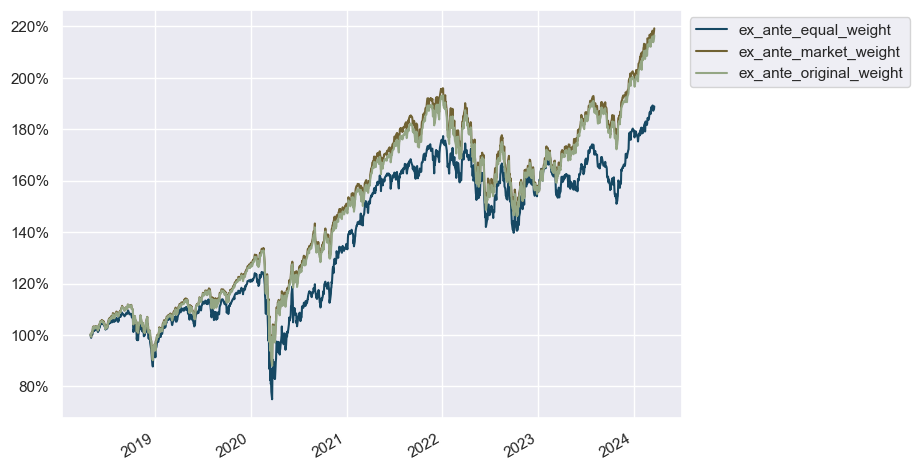

In [4]:
import quantkit.visualization.asset_allocation.returns as returns

returns.strategy_returns(r.strategies["benchmark"].all_portfolios)

# Mean Reversion vs. Momentum

,Portfolio,Total Return,CAGR%,Return YTD,Return 1 Year,Return 3 Years,Daily Std Dev,Annualized Std Dev,Sharpe Ratio,Sortino Ratio,VaR,cVaR,Max Drawdown
0,Mean-Reversion,24.22%,9.38%,3.79%,17.05%,10.60%,2.01%,31.93%,0.281,0.403,-3.27%,-5.25%,-50.51%
1,Momentum,86.94%,14.69%,9.45%,28.30%,20.39%,1.43%,22.63%,0.606,0.836,-2.29%,-3.56%,-35.54%
2,Benchmark,88.89%,14.07%,5.19%,23.15%,24.79%,1.36%,21.57%,0.610,0.854,-2.18%,-3.51%,-39.74%


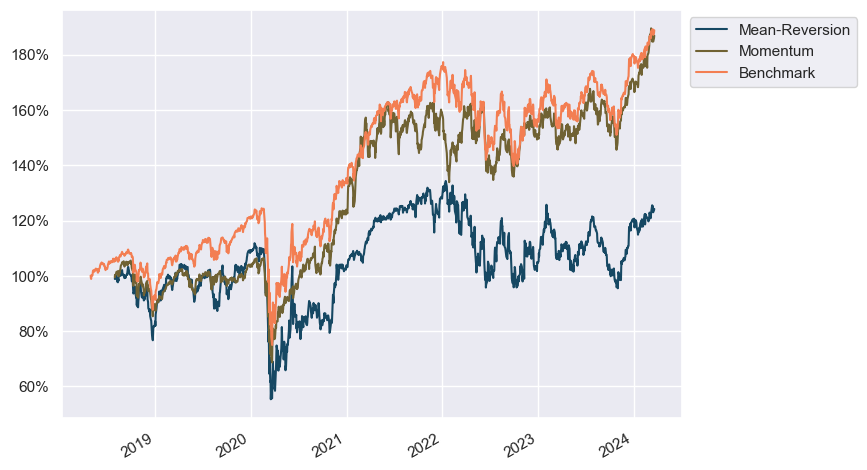

In [5]:
import quantkit.utils.return_statistics as return_statistics
import quantkit.visualization.asset_allocation.returns as returns

benchmark = r.strategies["benchmark"].all_portfolios[r.strategies["benchmark"].all_portfolios["portfolio_name"] == "ex_ante_equal_weight"]
mr = r.strategies["mean_reversion"].all_portfolios[r.strategies["mean_reversion"].all_portfolios["portfolio_name"] == "ex_ante_equal_weight"]
mom = r.strategies["momentum"].all_portfolios[r.strategies["momentum"].all_portfolios["portfolio_name"] == "ex_ante_equal_weight"]


benchmark["portfolio_name"] = "Benchmark"
mr["portfolio_name"] = "Mean-Reversion"
mom["portfolio_name"] = "Momentum"


returns.strategy_returns(pd.concat([mom, mr]), benchmark=benchmark)

mr_stats = return_statistics.return_stats(mr)
mom_stats = return_statistics.return_stats(mom)
benchmark_stats = return_statistics.return_stats(benchmark)
pd.DataFrame([mr_stats, mom_stats, benchmark_stats])

# Shapley

## Data

### Benchmark Returns

In [6]:
rolling_window_size = 21

In [7]:
benchmark_returns_df = r.strategies["benchmark"].all_portfolios
benchmark_returns_df = benchmark_returns_df[benchmark_returns_df["portfolio_name"] == "ex_ante_original_weight"]
benchmark_returns_df = benchmark_returns_df.dropna()

rolling_cumulative_benchmark_df = benchmark_returns_df["return"].rolling(rolling_window_size).sum().dropna(how="all")

### Securities' Returns

In [8]:
security_returns_df = r.prices_datasource.return_data
security_returns_df = np.log(security_returns_df+1)
security_returns_df = security_returns_df[security_returns_df.index.isin(benchmark_returns_df.index)]
security_returns_demeaned_df = security_returns_df.sub(benchmark_returns_df['return'], axis=0)
rolling_cumulative_returns_df = security_returns_df.rolling(rolling_window_size).sum().dropna(how="all")
rolling_cumulative_returns_demeaned_df = security_returns_demeaned_df.rolling(rolling_window_size).sum().dropna(how="all")

## Analysis

In [9]:
def create_down_df(returns_type, min_dropdown, rolling_window_size):

    if returns_type == "normal":
        cum_df = rolling_cumulative_returns_df
    elif returns_type == "demeaned":
        cum_df = rolling_cumulative_returns_demeaned_df

    down = cum_df < np.log(1-min_dropdown)
    down = down.loc[:, down.sum() >=1]

    last_true = np.zeros(len(down.columns))
    l = []
    for index, row in down.iterrows():
        a = np.where(( (row) & (last_true<1) ), 1, 0)
        last_true = np.where(row, rolling_window_size, last_true-1)
        l.append(list(a))

    down_df = pd.DataFrame(np.array(l), columns=down.columns, index=down.index)
    return down_df

In [10]:
def map_label(val):
    if val < -252:
        return "not recovered >1 year"
    elif val < -126:
        return "not recovered 6-12 months"
    elif val < -63:
        return "not recovered 3-6 months"
    elif val < -21:
        return "not recovered 1-3 months"
    elif val < 0:
        return "not recovered <1 month"
    elif val < 21:
        return "<1 month"
    elif val < 63:
        return "1-3 months"
    elif val < 126:
        return "3-6 months"
    elif val < 252:
        return "6-12 months"
    else:
        return ">1 year"

In [11]:
def days_to_recover(down_df, returns_type, min_dropdown):
    
    if returns_type == "normal":
        returns_df = security_returns_df
    elif returns_type == "demeaned":
        returns_df = security_returns_demeaned_df
    
    data_list = list()
    for col in sorted(down_df.columns):
        stock = down_df[[col]]
        
        sector = r.portfolio_datasource.tickers[col].parent_store.msci_information["GICS_SECTOR"]
        msci_id = r.portfolio_datasource.tickers[col].parent_store.msci_information["ISSUERID"]

        fundamental_df = r.portfolio_datasource.tickers[col].parent_store.fundamental_information
        fundamental_df = fundamental_df.set_index("datekey")
        fundamental_df = fundamental_df.drop(["reportperiod", 'dimension', 'date', 'reportperiod', 'lastupdated', "ticker"], axis=1)

        d_counter = {}
        d_cum = {}
        for index, row in stock.iterrows():
            if row[0]>0:
                d_counter[index] = 0
                d_cum[index] = 0
            for i in list(d_cum):
                d_counter[i] += 1
                d_cum[i] += np.log(returns_df.loc[index][col]+1)
                if d_cum[i] >= np.log(1+min_dropdown):

                    funds_index = fundamental_df.index.asof(i)
                    if pd.isnull(funds_index):
                        fundamentals = dict()
                    else:
                        fundamentals = fundamental_df.loc[funds_index].to_dict()
                    
                    data_d = {
                        "Ticker": col,
                        "Sector": sector,
                        "Date": i,
                        "Previous Rolling Log Returns": rolling_cumulative_returns_df.loc[i][col],
                        "Previous Rolling Demeaned Log Returns": rolling_cumulative_returns_demeaned_df.loc[i][col],
                        "Previous Rolling Log Returns Index": rolling_cumulative_benchmark_df.loc[i],
                        "Days to Recover": d_counter[i],
                        "Recover Time": map_label(d_counter[i]),
                        "Did Revocer": True,
                    }
                    data_d = data_d | fundamentals
                    data_list.append(data_d)
                    del d_cum[i]
                    del d_counter[i]
        for rest in d_counter:
            funds_index = fundamental_df.index.asof(rest)
            if pd.isnull(funds_index):
                fundamentals = dict()
            else:
                fundamentals = fundamental_df.loc[funds_index].to_dict()

            data_d = {
                "Ticker": col,
                "Sector": sector,
                "Date": rest,
                "Previous Rolling Log Returns": rolling_cumulative_returns_df.loc[rest][col],
                "Previous Rolling Demeaned Log Returns": rolling_cumulative_returns_demeaned_df.loc[rest][col],
                "Previous Rolling Log Returns Index": rolling_cumulative_benchmark_df.loc[rest],
                "Days to Recover": -d_counter[rest],
                "Recover Time": map_label(-d_counter[rest]),
                "Did Revocer": False,
            }
            data_d = data_d | fundamentals
            data_list.append(data_d)
    return pd.DataFrame(data_list)

In [12]:
import seaborn as sns

def plot_boxplot(df):
    order = [
        "not recovered >1 year",
        "not recovered 6-12 months", 
        "not recovered 3-6 months",
        "not recovered 1-3 months",
        "not recovered <1 month",
        "<1 month",
        "1-3 months",
        "3-6 months",
        "6-12 months",
        ">1 year"
        ]

    sns.set(style="darkgrid")
    ax = sns.countplot(x="Recover Time", data=df, order=order)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

### Normal Returns

In [13]:
normal_down_df = create_down_df("normal", 0.25, rolling_window_size)
normal_df = days_to_recover(normal_down_df, "normal", 0.25)

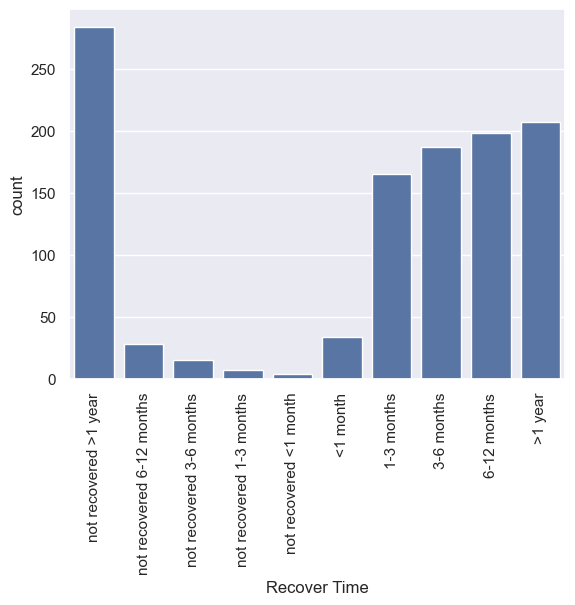

In [14]:
plot_boxplot(normal_df)

### Demeaned Returns

In [15]:
demeaned_down_df = create_down_df("demeaned", 0.2, rolling_window_size)
demeaned_df = days_to_recover(demeaned_down_df, "demeaned", 0.2)

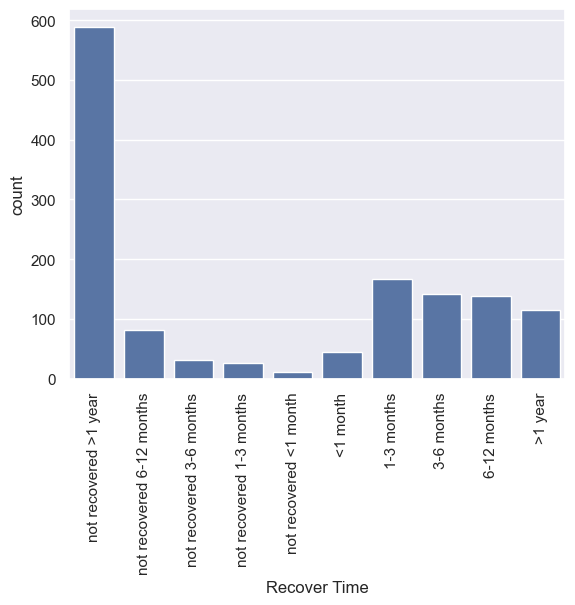

In [16]:
plot_boxplot(demeaned_df)

### Feature Importance

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 607, number of negative: 589
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25279
[LightGBM] [Info] Number of data points in the train set: 1196, number of used features: 105
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507525 -> initscore=0.030103
[LightGBM] [Info] Start training from score 0.030103
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

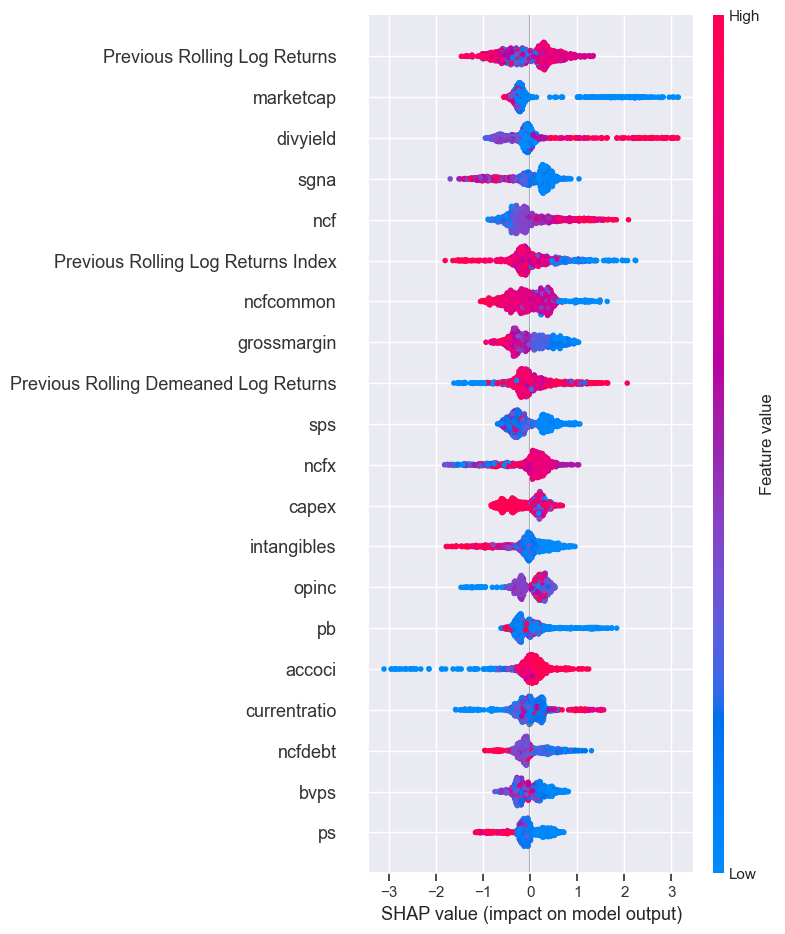

In [17]:
import quantkit.visualization.shapley.shapley as shapley


binary_demeaned = demeaned_df[~demeaned_df["Recover Time"].isin([
    'not recovered <1 month', 'not recovered 1-3 months','not recovered 3-6 months', 'not recovered 6-12 months'])]

X = binary_demeaned.drop([
"Ticker",
"Sector", 
"Date",
"Days to Recover",
'Recover Time', 
"Did Revocer", 
"price", 
# 'Previous Rolling Log Returns', 
# 'Previous Rolling Demeaned Log Returns',
# 'Previous Rolling Log Returns Index'
],axis=1)
y = binary_demeaned["Did Revocer"]

shapley.plot_shapley(X, y)

[LightGBM] [Info] Number of positive: 353, number of negative: 925
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24584
[LightGBM] [Info] Number of data points in the train set: 1278, number of used features: 102
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.276213 -> initscore=-0.963326
[LightGBM] [Info] Start training from score -0.963326
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

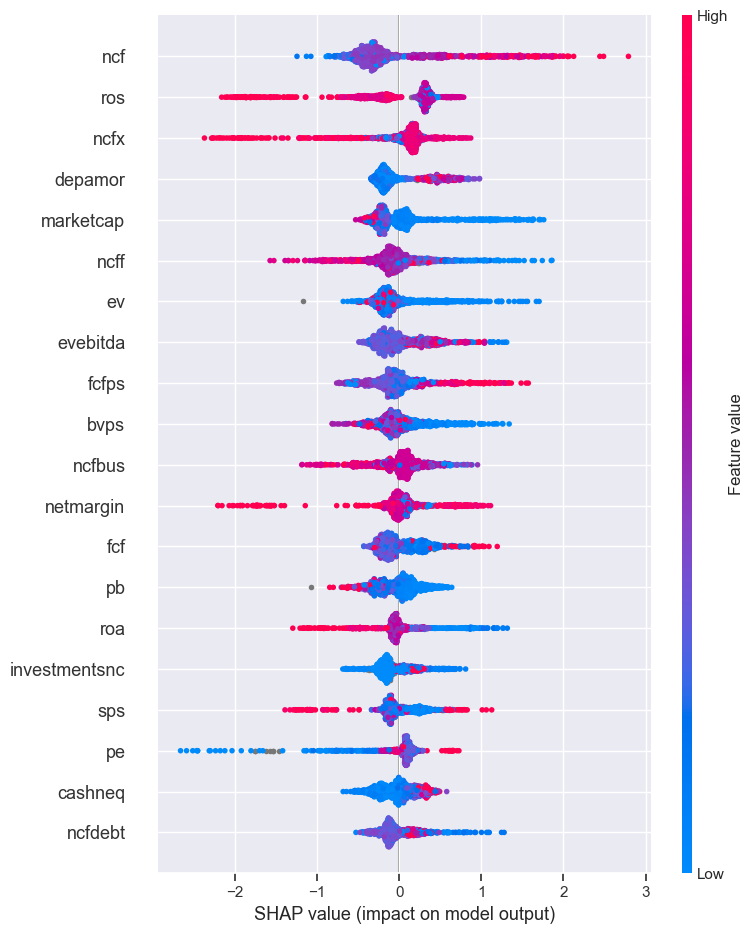

In [18]:
recover_under_6months = demeaned_df[~demeaned_df["Recover Time"].isin([
    'not recovered <1 month', 'not recovered 1-3 months','not recovered 3-6 months'])]

recover_under_6months["Did Revocer"] = np.where(
    recover_under_6months["Recover Time"].isin([
        ">1 year",
        "not recovered >1 year",
        "not recovered 6-12 months",
        "6-12 months",
        ]),
        False,
        True
)

X = recover_under_6months.drop([
"Ticker",
"Sector", 
"Date",
"Days to Recover",
'Recover Time', 
"Did Revocer", 
"price", 
'Previous Rolling Log Returns', 
'Previous Rolling Demeaned Log Returns',
'Previous Rolling Log Returns Index'
],axis=1)
y = recover_under_6months["Did Revocer"]

shapley.plot_shapley(X, y)